In [1]:
import glob
import csv
import numpy as np
import matplotlib.pyplot as ppt
%matplotlib inline

STEPS = 1000
LIMITS = np.linspace(start=0, stop=1, num=STEPS)

#AE_ROOT = '/media/sf_Masterarbeit/data/GTSRB_TRAIN_PREPROCESSED_AE_0.037'
AE_ROOT = '/media/sf_Masterarbeit/data/AE/ILSVRC2012_AE_50'
SAVE_PATH = '/media/sf_Masterarbeit/master-thesis/report/images/ae-batch-distribution/imagenet-ae-50.png'

print('Working with AE batch {0}'.format(AE_ROOT))
print('Dividing confidences into {0} steps'.format(STEPS))

Working with AE batch /media/sf_Masterarbeit/data/AE/ILSVRC2012_AE_50
Dividing confidences into 1000 steps


In [2]:
confidences = []

for csv_path in glob.glob(AE_ROOT + '/*.csv'):
    with open(csv_path) as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            confidences.append(float(row['Confidence']))

confidences.sort()

print('Collected {0} confidence values.'.format(len(confidences)))

Collected 2500 confidence values.


In [3]:
percentiles = []
for l in LIMITS:
    for idx, confidence in enumerate(reversed(confidences)):
        if confidence < l:
            percentiles.append(idx)
            break
    else:
        percentiles.append(len(confidences))

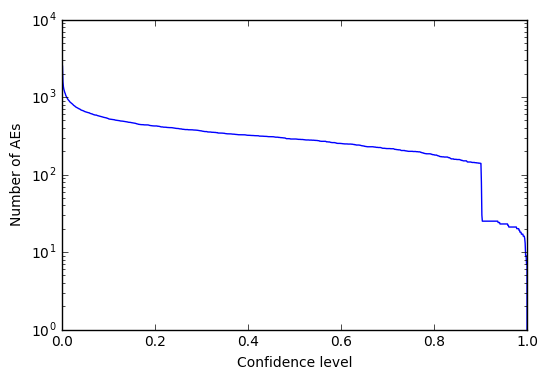

In [4]:
ppt.plot(LIMITS, percentiles)
ppt.xlabel('Confidence level')
ppt.ylabel('Number of AEs')
ppt.yscale('log')

ppt.savefig(SAVE_PATH, bbox_inches='tight')